EWMA focuses on giving more weight to recent data to build a simple general predictive model based on previous trends.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month')    # date not parsed as there are missing values present
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [9]:
# index data type is not datetime
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [10]:
# drop null values first
df.dropna(inplace = True)

In [11]:
df.index = pd.to_datetime(df.index)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [14]:
df['6-month-SMA'] = df['Thousands of Passengers'].rolling(6).mean()
df['12-month-SMA'] = df['Thousands of Passengers'].rolling(12).mean()
df.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


### Simple Moving Average

<Axes: xlabel='Month'>

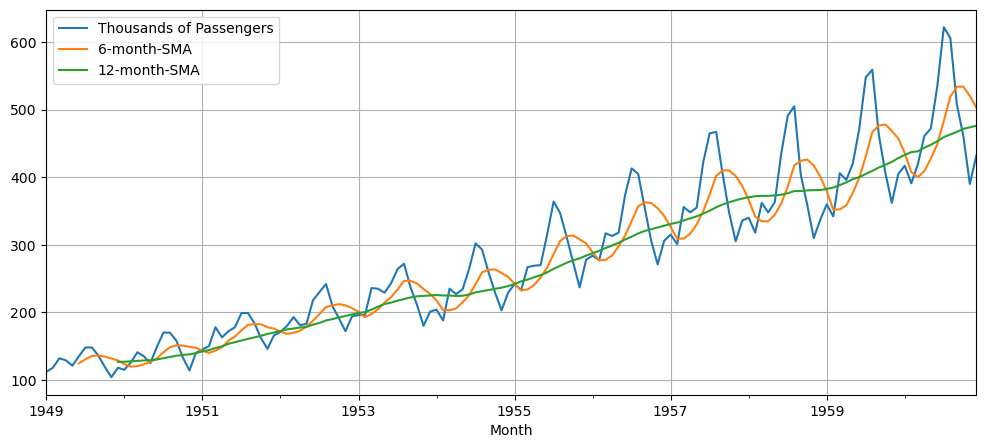

In [15]:
df.plot(figsize = (12, 5), grid = True)

### Exponentially Weighted Moving Average

In [16]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span = 12).mean()

In [19]:
df.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA-12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685
1949-06-01,135,124.500000,NaN,126.092005
1949-07-01,148,130.500000,NaN,130.980697
1949-08-01,148,135.500000,NaN,134.532364
1949-09-01,136,136.166667,NaN,134.822714


<Axes: xlabel='Month'>

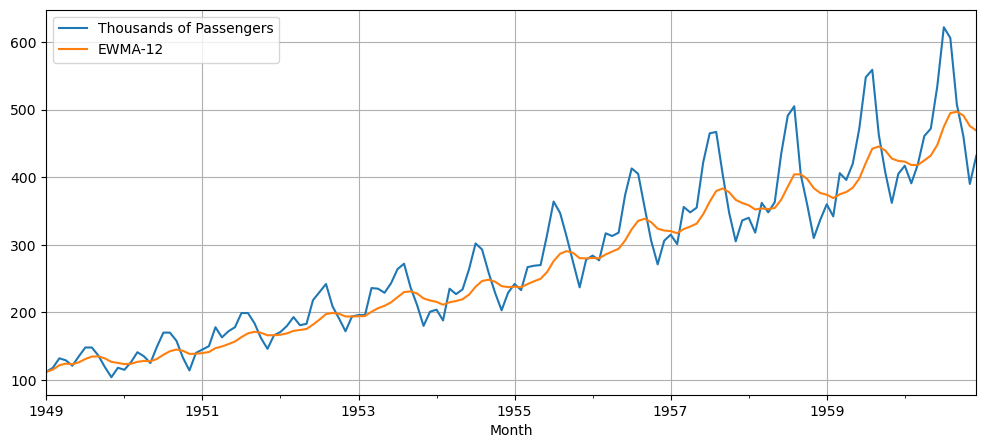

In [18]:
# notice how this plot does not have missing values for average and is smoother as the begging only
df[['Thousands of Passengers','EWMA-12']].plot(figsize = (12, 5), grid = True)